this project is based on dataset-"pima-indians-diabetes.csv".
this dataset is based on healthcare domain.
this is a binary classification dataset with an onset of diabetes as 1 or not as 0.
all the input variables that describe each patients are numerical.
this dataset describes the patients medical record data for pima indians and whether they had a diabetes within 5 years.
pima indians are native americans group that live in  Mexio and Arizona, USA.

the objective of this project is to find out best performing machine learning classification algorithm which gives us best prediction score against few other algorithms, so that in future we can apply that one algorithm on similar kind of dataset to get most efficient output.


features and label of this dataset:
input variables(X):
1. Number of times pregnant
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-hour serum insulin (μIU/ml)
6. Body mass index (weight in kg/(height in m))
7. Diabetes pedigree function
8. Age (years)

output variable(y):
class variable(0 or 1)

#importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading dataset

In [2]:
def load_data(file):
    col_names=["preg","plas","pres","skin","test","mass","pedi","age","class"]
    dataframe=pd.read_csv(file,names=col_names)
    return dataframe

In [3]:
filename="pima-indians-diabetes.csv"

In [4]:
df=load_data(filename)

data preparation: understanding dataset with descriptive statistics,
    checking dimensions of dataset
    reviewing data types of attributes
    understanding correlation between variables
    reviewing skew of distributions of each attributes, etc.

In [5]:
def top_10_rows(dframe):
    print(dframe.head(10))

In [6]:
top_10_rows(df)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


In [7]:
def df_rows_columns(dframe):
    print(dframe.shape)

In [8]:
df_rows_columns(df)

(768, 9)


In [9]:
def df_columns_dtypes(dframe):
    print(dframe.dtypes)

In [10]:
df_columns_dtypes(df)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [11]:
def df_summary(dframe):
    print(dframe.describe())

In [12]:
df_summary(df)

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [13]:
#checking class distribution

In [14]:
def classes_count(dframe):
    each_class_count=dframe.groupby("class").size()
    print(each_class_count)

In [15]:
classes_count(df)

class
0    500
1    268
dtype: int64


In [16]:
#correlation between atributes

In [17]:
def correlation(dframe):
    correlations=dframe.corr(method="pearson")
    print(correlations)

In [18]:
correlation(df)

           preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.0335

In [19]:
#skew of univariate distributions,
#negative value shows skewed to the left, while positive value shows right skew and values closer to zero shows less skewed.

In [20]:
def df_skew(dframe):
    sq=dframe.skew()
    print(sq)

In [21]:
df_skew(df)

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64


#Data Visualization

    univariate plots
        histogram, density plot, boxplot
    multivariate plots
        correlation matrix
        scatter matrix

In [22]:
#Histogram
#histograms group data into bins, and provide a count of number of observations in each bin.

In [23]:
def df_histogram(dframe):
    dframe.hist()
    plt.tight_layout()
    plt.show()

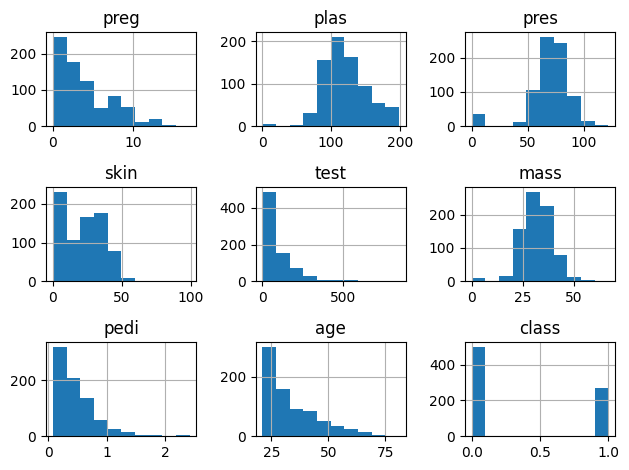

In [24]:
df_histogram(df)

In [25]:
#Density plot
#for getting a quick idea of distribution of each attributes.

In [26]:
def df_density_plot(dframe):
    dframe.plot(kind="density",
               subplots=True,
               layout=(3,3),
               )
    plt.tight_layout()
    plt.show()

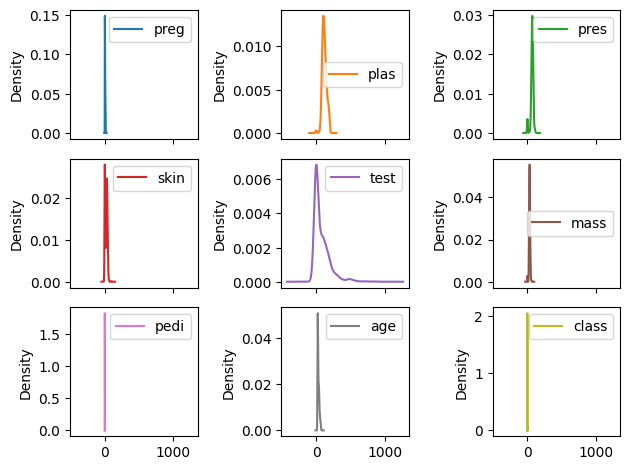

In [27]:
df_density_plot(df)

In [28]:
#Boxplots
#boxplots summarize the distribution of each attribute, drawing a line for median, 
#and a box around 25th and 75th percentiles(the middle 50%of the data).
#the whiskers give an idea of spread of data and the dots outside of whiskers show outliers.

In [29]:
def df_box_plot(dframe):
    dframe.plot(kind="box",
               subplots=True,
               layout=(3,3),
               )
    plt.tight_layout()
    plt.show()

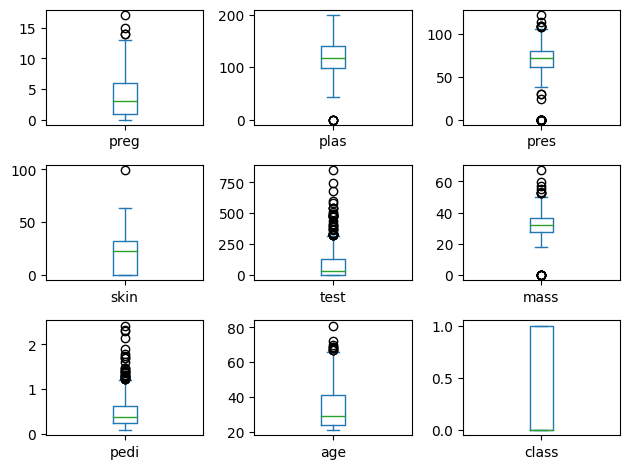

In [30]:
df_box_plot(df)

In [31]:
#Correlation matrix plot
#to calculate the correlation between each pair of attributes.

In [32]:
def corr_matrixx(dframe):
    plt.figure(figsize=(6,4))
    correlation_matrix=dframe.corr()
    mask=np.triu(correlation_matrix)
    sns.heatmap(correlation_matrix,annot=True,mask=mask,
               cbar=True,cmap="PiYG",fmt=".1f")

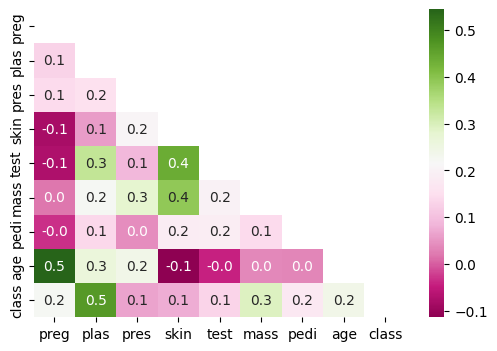

In [33]:
corr_matrixx(df)

In [34]:
#Scatter matrix
#this shows relationship between 2 variables as dots in 2d
#this is useful for spotting structured relationship between variables

In [35]:
from pandas.plotting import scatter_matrix

In [36]:
def scat_matrix(dframe):
    scatter_matrix(dframe, figsize=(8,8))
    plt.tight_layout()
    plt.show()

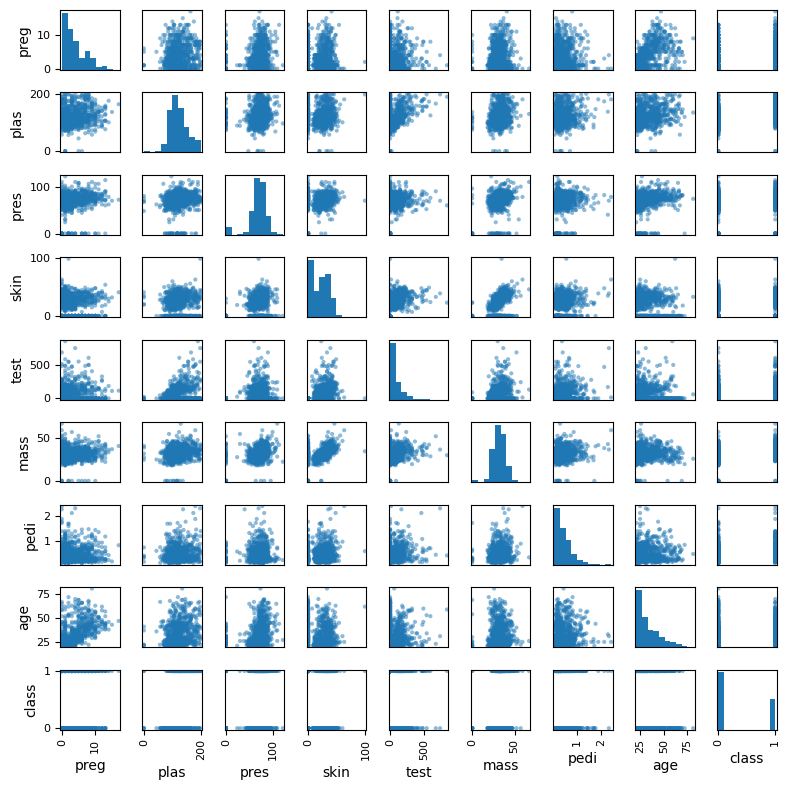

In [37]:
scat_matrix(df)

#Data Preprocessing

In [38]:
#preparing data for machine learning model
        #rescaling, standardizing, normalizing, binarizing

In [39]:
#rescaling attributes
#we need to rescale the attributes to have them all as same scale, 
#so that machine learning algorithm can easily and efficiently process through the complex data.
#we will use MinMaxScaler to scale the data values within a range of 0 to 1.

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
def rescale_data(array):
    X=array[:,0:8]
    y=array[:,8]
    scaler=MinMaxScaler(feature_range=(0,1))
    rescaledX=scaler.fit_transform(X)
    np.set_printoptions(precision=3)
    print(rescaledX[0:5,:])

In [42]:
arr=df.values

In [43]:
rescale_data(arr)

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [44]:
#standardizing:
#this is another scaling method where values are centered around the mean and standard deviation.
#it shapes into gaussian distribution

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
def standardize_data(array):
    X=array[:,0:8]
    y=array[:,8]
    scaler=StandardScaler().fit(X)
    rescaledX=scaler.transform(X)
    np.set_printoptions(precision=3)
    print(rescaledX[0:5])

In [47]:
standardize_data(arr)

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [48]:
#Normalize data

In [49]:
from sklearn.preprocessing import Normalizer

In [50]:
def normalize_data(array):
    X=array[:,:-1]
    y=array[:,-1]
    scaler=Normalizer().fit(X)
    rescaledX=scaler.transform(X)
    np.set_printoptions(precision=3)
    print(rescaledX[0:5,:])

In [51]:
normalize_data(arr)

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [52]:
#feature selection
#having irrelevant features can lead to decreased accuracy of models, 
#especially linear models like linear and logistic regression.
#objective of feature selection-reduces overfitting
                               #improves accuracy
                               #reduces training time

In [53]:
#univariate selection

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [55]:
def select_best_features(array):
    X=array[:,:-1]
    y=array[:,-1]
    best=SelectKBest(score_func=chi2,k=4)
    feat=best.fit(X,y)
    np.set_printoptions(precision=3)
    
    print(feat.scores_)
    
    features=feat.transform(X)
    print(features[:5,:])

In [56]:
arr=df.values

In [57]:
select_best_features(arr)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [58]:
#feature_importance

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

In [60]:
def feature_importance(array):
    X=array[:,0:8]
    y=array[:,8]
    model=ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_)

In [61]:
arr=df.values

In [62]:
feature_importance(arr)

[0.109 0.231 0.098 0.08  0.076 0.142 0.119 0.144]


#Evaluation of machine learning algorithms



In [63]:
#train and test datasets
#KFold cross validation

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
def splitting_data(array):
    X=array[:,:-1]
    y=array[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=0)
    return X_train,X_test,y_train,y_test

def model_train(X_train,X_test,y_train,y_test):
    model=LogisticRegression(solver="lbfgs",max_iter=3000)
    model.fit(X_train,y_train)
    result=model.score(X_test,y_test)
    print("Accuracy:",result*100)

In [66]:
arr=df.values

In [67]:
X_train,X_test,y_train,y_test=splitting_data(arr)

In [68]:
model_train(X_train,X_test,y_train,y_test)

Accuracy: 77.95275590551181


In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [70]:
def k_fold_cross(array):
    X=array[:,:-1]
    y=array[:,-1]
    kfold=KFold(n_splits=10)
    model=LogisticRegression(solver="lbfgs",max_iter=3000)
    results=cross_val_score(model,X,y,cv=kfold)
    print("Accuracy:",results.mean()*100)

In [71]:
arr=df.values

In [72]:
k_fold_cross(arr)

Accuracy: 77.60423786739577


#classification metrics

In [73]:
#classification accuracy
#area under ROC curve
#classification report


In [74]:
#classification accuracy
#ratio of number of correct predictions out of all predictions

In [75]:
def classification_acc(array):
    X=array[:,:-1]
    y=array[:,-1]
    kfold=KFold(n_splits=10)
    model=LogisticRegression(solver="lbfgs",max_iter=3000)
    results=cross_val_score(model,X,y,cv=kfold,scoring="accuracy")
    print("Accuracy:",results.mean()*100)

In [76]:
arr=df.values

In [77]:
classification_acc(arr)

Accuracy: 77.60423786739577


In [78]:
#area under ROC curve;ROC(Receiver Operating Characteristic Curve)
#Area under ROC curve or in short AUC is a performance metrics for binary classification problems.
#AUC represents a model's ability to discriminate between positive and negative classes.
#area of 1.0 represents a model that made all predictions perfectly, while area of 0.5 tells that it is as good as random.

In [79]:
def area_under_roc(array):
    X=array[:,:-1]
    y=array[:,-1]
    kfold=KFold(n_splits=10)
    model=LogisticRegression(solver="lbfgs",max_iter=3000)
    results=cross_val_score(model,X,y,cv=kfold,scoring="roc_auc")
    print("Accuracy:",results.mean()*100)

In [80]:
arr=df.values

In [81]:
area_under_roc(arr)

Accuracy: 82.80277116334987


#Classification report


In [82]:
#this function displays: precision, recall, F1-score and support for each class.

In [83]:
from sklearn.metrics import classification_report

In [84]:
def splitting_data(array):
    X=array[:,:-1]
    y=array[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)
    return X_train,X_test,y_train,y_test

def classifi_report(X_train,X_test,y_train,y_test):
    model=LogisticRegression(solver="lbfgs",max_iter=3000)
    model.fit(X_train,y_train)
    predicted=model.predict(X_test)
    report=classification_report(y_test,predicted)
    print(report)
    

In [85]:
arr=df.values

In [86]:
X_train,X_test,y_train,y_test=splitting_data(arr)

In [87]:
classifi_report(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       170
         1.0       0.73      0.52      0.61        84

    accuracy                           0.78       254
   macro avg       0.76      0.71      0.73       254
weighted avg       0.77      0.78      0.77       254



#selecting best algorithm

In [88]:
#we will select best algorithm out of all these algorithms-
    #Logistic Regression
    #Linear Discriminant Analysis
    #K Nearest Neighbors
    #Classification of Decision Trees
    #Naive Bayes
    #Support Vector Machine

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [90]:
def all_models():
    models=[]
    models.append(("LR",LogisticRegression(solver="lbfgs",max_iter=3000)))
    models.append(("LDR",LinearDiscriminantAnalysis()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("CART",DecisionTreeClassifier()))
    models.append(("NB",GaussianNB()))
    models.append(("SVM",SVC()))
    return models

In [91]:
def train_models_scores(algorithms,X,y):
    results=[]
    names=[]
    for name, algorithm in algorithms:
        kfold=KFold(n_splits=10)
        cv_results=cross_val_score(algorithm,X,y,cv=kfold,scoring="accuracy")
        results.append(cv_results)
        names.append(name)
        msg=(name,cv_results.mean(),cv_results.std())
        print(msg)
     
    fig=plt.figure()
    fig.suptitle("Algorithm comparison")
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [92]:
arr=df.values
X=arr[:,:-1]
y=arr[:,-1]
ml_models=all_models()

('LR', 0.7760423786739576, 0.051575452620868226)
('LDR', 0.773462064251538, 0.05159180390446138)
('KNN', 0.7265550239234451, 0.06182131406705549)
('CART', 0.6874231032125768, 0.06505496718666828)
('NB', 0.7551777170198223, 0.04276593954064409)
('SVM', 0.7604237867395763, 0.05293077027238117)


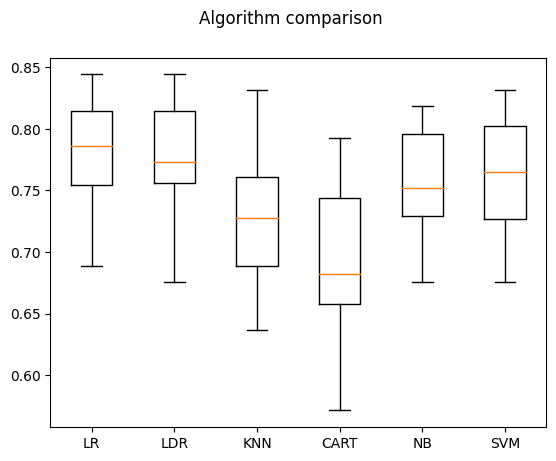

In [93]:
train_models_scores(ml_models,X,y)

#conclusion

In [94]:
#LogisticRegression score is most efficient compared to others